### **Topic Modelling on Disneyland Reviews.**

Our analysis involves customer reviews and ratings from three Disney branches. Customers have rated their experiences on a scale of 1 to 5, with ratings of 1 to 3 indicating negative review and ratings of 4 and 5 indicating positive review.

We will conduct separate topic modeling analyses on the positive and negative reviews for each branch. Our aim is to identify the topics that are contributing to positive feedback and attracting customers, as well as the topics that are leading to negative feedback.Identifying the positive aspects will help us understand the reasons for customer footfall and identifying the negative aspects will enable us to address the issues and improve the overall customer experience.

We aim to perform Topic modeling for each branch, extracting topics on a monthly and seasonal basis. Our aim was to explore how the topics discussed by people are influenced by the month or season

Our ultimate goal is to help the Disneyland authorities address customer feedback and improve their services..


**We will be focusing only on Exploratory Analysis for all three Disneyland in this notebook**

**Table of contents**

1. Exploratory Data Analysis 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import names 
import random
import nltk 
import calendar
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import pandas as pd
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
import re
from nltk.corpus import treebank
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics
from nltk.corpus import brown
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from gensim import corpora
import gensim
from gensim.models.coherencemodel import CoherenceModel

### Reading Data

In [2]:
reviews_df = pd.read_csv('/Users/aasthatandon/Library/Mobile Documents/com~apple~CloudDocs/CSUEB materials/Spring 2023/BAN 676/Project/BAN675/Team Project/Data/DisneylandReviews.csv', encoding='latin-1')
reviews_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
reviews_df.shape

(42656, 6)

### Branch

In [4]:
reviews_df['Location'] = reviews_df.Branch.str[11:]
reviews_df.drop(columns="Branch", inplace=True)
reviews_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


### Removing Missing Year_Month

In [5]:
#To select rows whose column value equals 'missing' in 'Year_Month':
missing = reviews_df.loc[reviews_df['Year_Month'] == 'missing']
#keep the missing rows seperate
reviews_df = reviews_df[reviews_df.Year_Month != 'missing']
reviews_df.shape

(40043, 6)

#### Average Rating by location

In [6]:
avg_rating = pd.DataFrame(reviews_df.groupby(["Location"]).agg({'Rating': ['mean', 'count']})).round(2).reset_index()
avg_rating

Location Rating       
                mean  count
0  California   4.41  18202
1    HongKong   4.22   9147
2       Paris   3.98  12694

### Extracting Year and Month

In [7]:
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Year_Month']).year
reviews_df['Year'] = pd.to_numeric(reviews_df['Year'])
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Year_Month']).month
reviews_df['Month'] = pd.to_numeric(reviews_df['Month'])
reviews_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4


In [8]:
reviews_df.drop('Year_Month', axis=1, inplace = True)
reviews_df = reviews_df.reset_index(drop=True)
reviews_df.head(5)

,Review_ID,Rating,Reviewer_Location,Review_Text,Location,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4


### Average Rating by Year per Location

In [9]:
avg_rating_year = pd.DataFrame(reviews_df.groupby(["Location",'Year']).agg({'Rating': ['mean']})).round(2)
avg_rating_year = avg_rating_year.unstack().T.reset_index().drop(columns=['level_0','level_1'])
avg_rating_year

Location,Year,California,HongKong,Paris
0,2010,4.56,3.68,3.85
1,2011,4.49,4.12,3.85
2,2012,4.54,4.06,3.97
3,2013,4.47,4.19,3.86
4,2014,4.41,4.17,4.02
5,2015,4.43,4.23,4.03
6,2016,4.39,4.25,4.00
7,2017,4.31,4.31,4.09
8,2018,4.24,4.25,3.95
9,2019,4.36,4.20,3.75


Over the years, California's rating compared to Paris and Hong Kong has been the best except 2018 

Text(0, 0.5, 'Average rating')

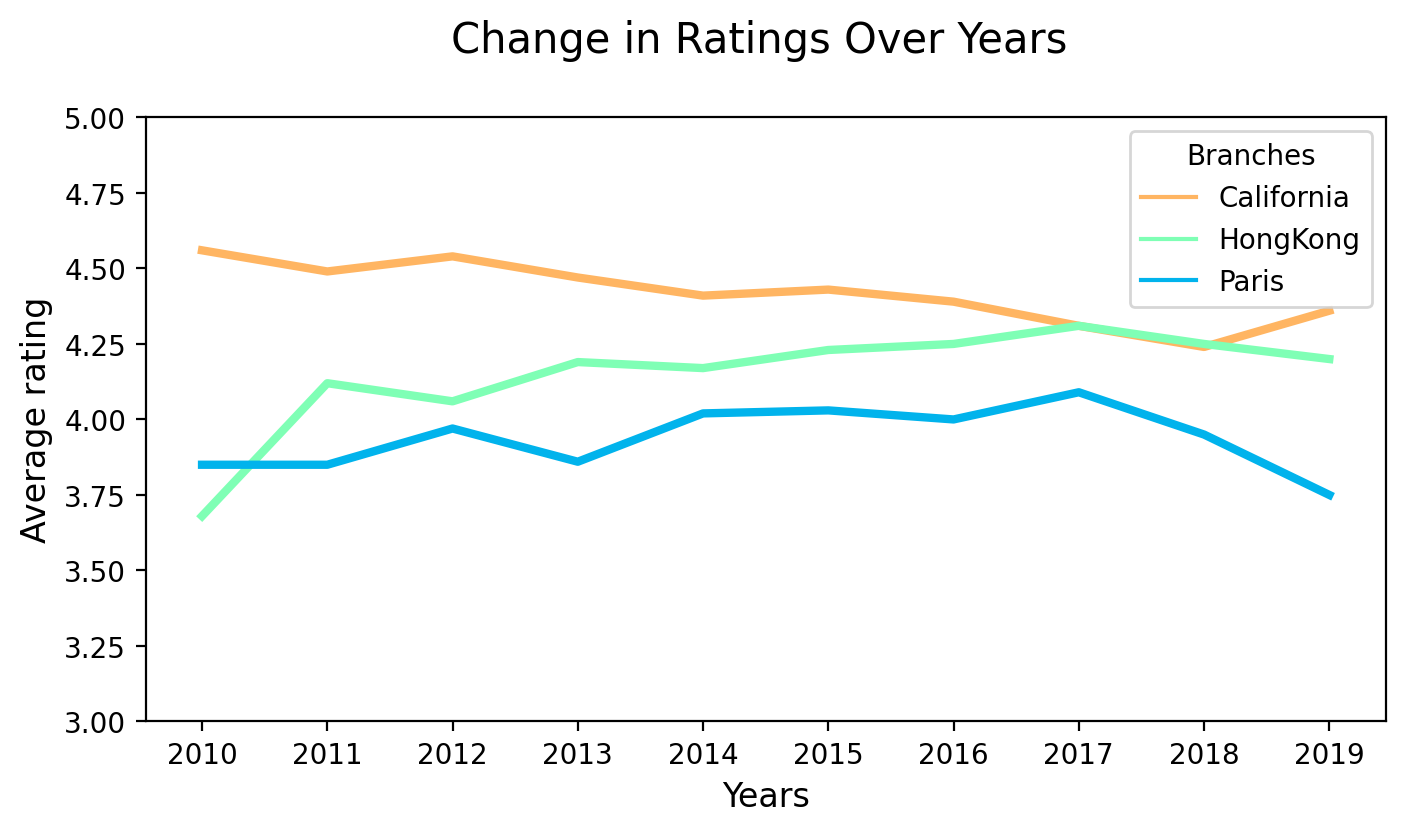

In [44]:
# Create Figure
#plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
ax.set_xticks(avg_rating_year['Year'])
ax.set_ylim(3,5)

ax =sns.lineplot(x='Year', y='Avg-rating', hue='Branches', palette= 'rainbow_r', lw=3,
                 data = avg_rating_year.melt('Year', var_name='Branches', value_name='Avg-rating'),ax=ax)
ax.set_title('Change in Ratings Over Years \n', fontsize = 15)
ax.set_xlabel("Years", fontsize = 12)
ax.set_ylabel("Average rating", fontsize = 12)

Based on the graph, while California has consistently had a high rating throughout the years, it does appear that there has been a slight decrease in its rating over time. On the other hand, Hong Kong has shown significant improvement in its rating over the years, with a noticeable upward trend in its rating.

It's important to note that ratings can fluctuate over time and may be influenced by various factors such as changes in government policies, economic conditions, and social issues. Therefore, it's crucial to analyze the underlying reasons for these changes to better understand the trends and make informed decisions based on the data.

In [11]:
avg_rating_month = pd.DataFrame(reviews_df.groupby(["Location",'Month']).agg({'Rating': ['mean']})).round(2)
avg_rating_month = avg_rating_month.unstack().T.reset_index().drop(columns=['level_0','level_1'])
avg_rating_month

Location,Month,California,HongKong,Paris
0,1,4.39,4.24,4.16
1,2,4.37,4.15,4.02
2,3,4.35,4.28,3.95
3,4,4.39,4.24,3.93
4,5,4.39,4.27,3.98
5,6,4.43,4.26,3.81
6,7,4.43,4.10,3.97
7,8,4.47,3.91,3.84
8,9,4.53,4.25,4.16
9,10,4.35,4.25,4.05


In [34]:
#help(sns.lineplot)

Text(0, 0.5, 'Average rating')

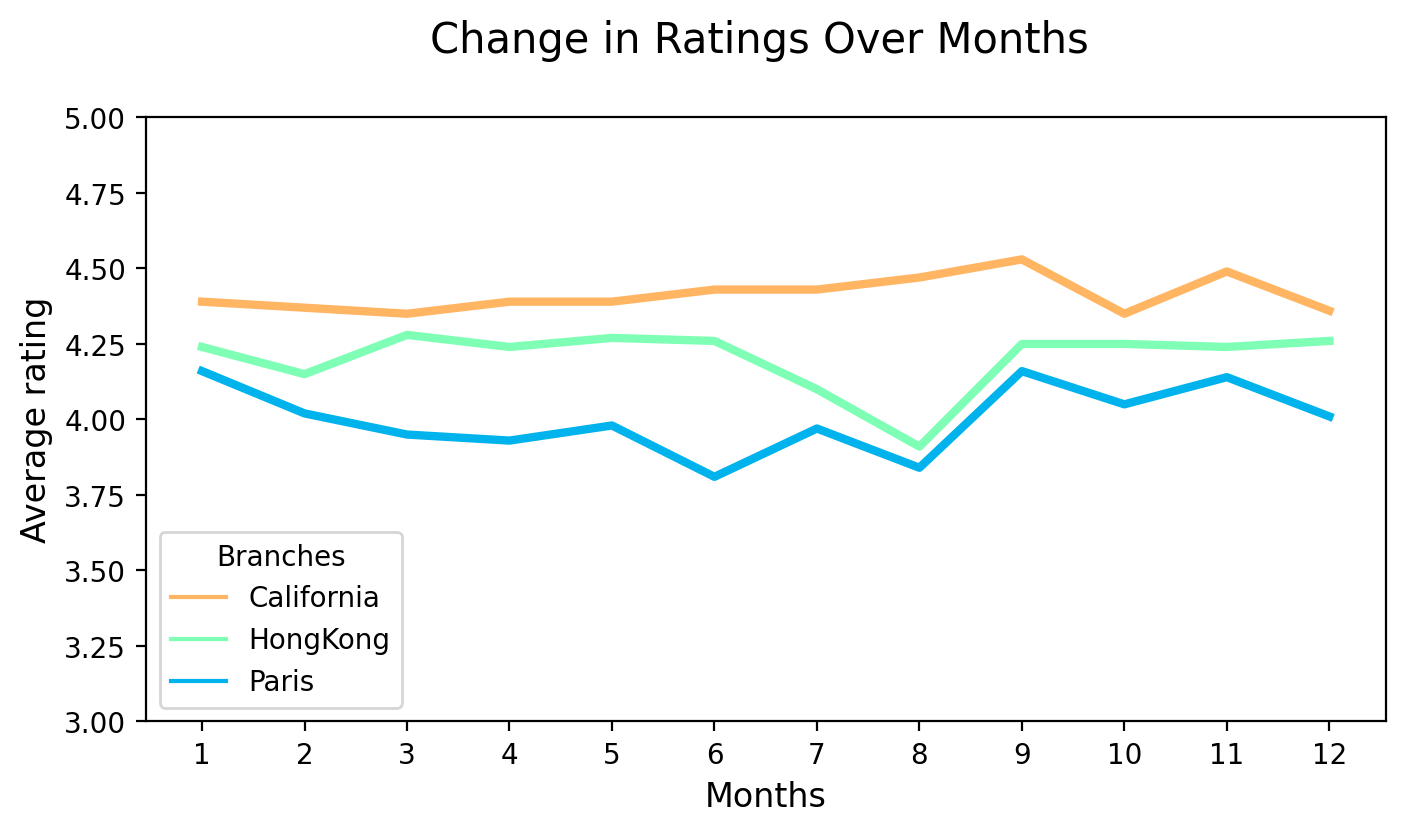

In [41]:
# Create Figure
#plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
ax.set_xticks(avg_rating_month['Month'])
ax.set_ylim(3, 5)

ax = sns.lineplot(
    x='Month', y='Avg-rating', hue='Branches', palette= 'rainbow_r', lw=3,
    data=avg_rating_month.melt('Month', var_name='Branches', value_name='Avg-rating'),
    ax=ax
)

ax.set_title('Change in Ratings Over Months \n', fontsize = 15)
ax.set_xlabel("Months", fontsize = 12)
ax.set_ylabel("Average rating", fontsize = 12)

The graph suggests that September is the highest rated month for California, but June and August are the lowest rated months for Paris, and August is the lowest rated month for Hong Kong. However, it's important to keep in mind that there could be various factors contributing to these fluctuations in ratings. Therefore, it's crucial to delve deeper and gain a better understanding of the underlying reasons for these changes to accurately analyze the trends.

(0.0, 2000.0)

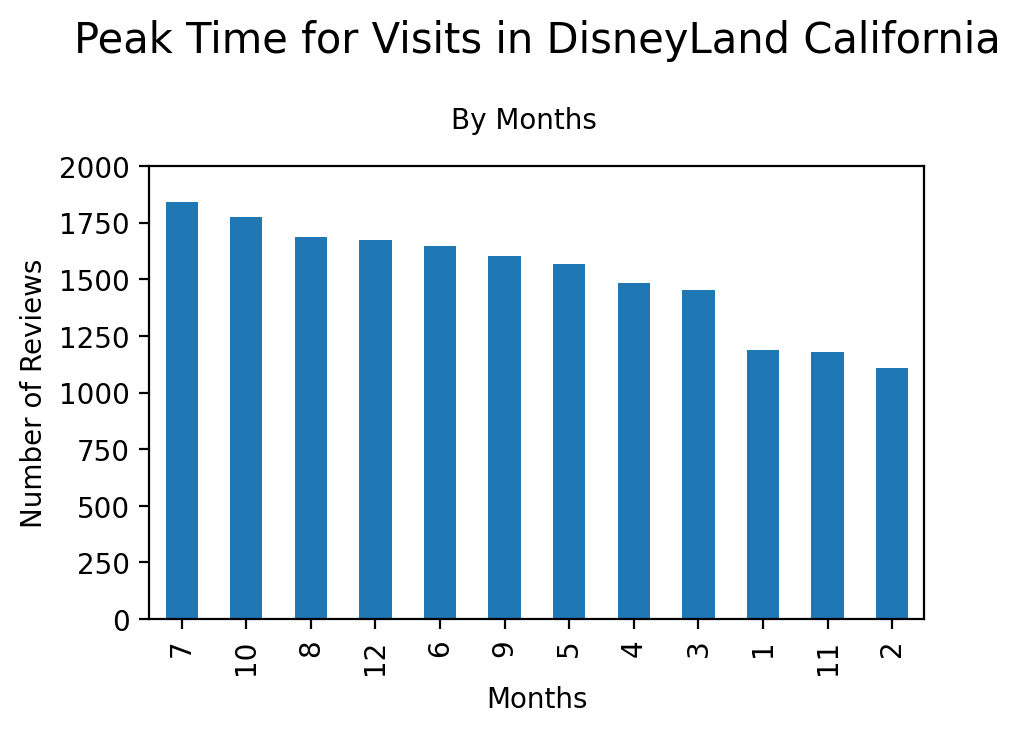

In [16]:
reviews_df_cal = reviews_df[reviews_df['Location'] == 'California']

plt.figure(figsize=(5, 3), dpi=200)
reviews_df_cal.Month.value_counts().plot(kind = 'bar')
plt.title("Peak Time for Visits in DisneyLand California\n\n", fontsize = 15);
plt.suptitle('By Months\n', fontsize = 10)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Number of Reviews", fontsize = 10)
plt.ylim(top=2000)

(0.0, 2000.0)

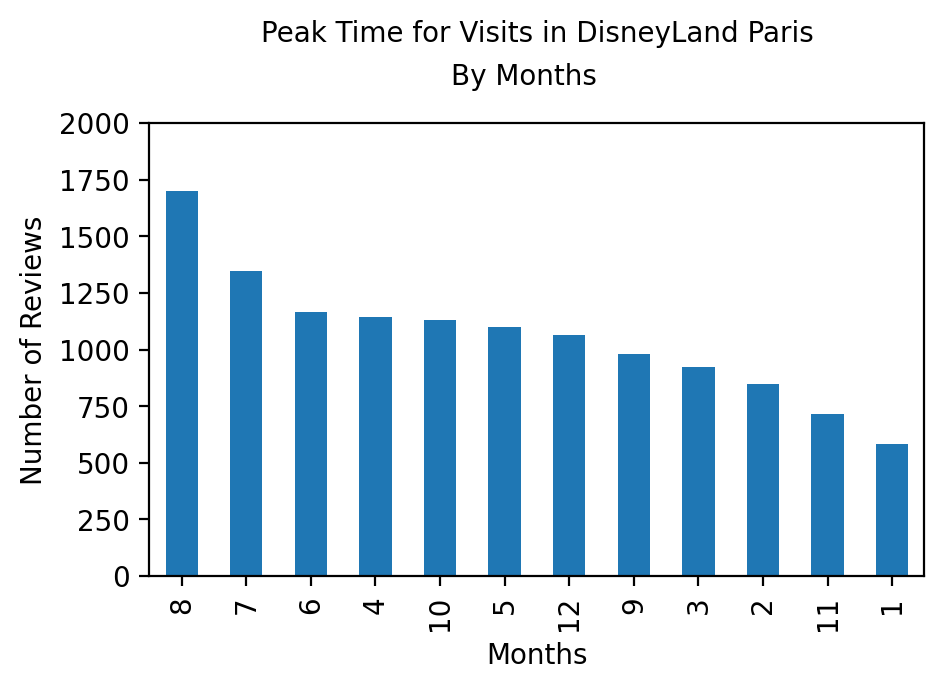

In [17]:
reviews_df_par = reviews_df[reviews_df['Location'] == 'Paris']

plt.figure(figsize=(5, 3), dpi=200)
reviews_df_par.Month.value_counts().plot(kind = 'bar')
plt.title("Peak Time for Visits in DisneyLand Paris\n\n", fontsize = 10);
plt.suptitle('By Months\n', fontsize = 10)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Number of Reviews", fontsize = 10)
plt.ylim(top=2000)

(0.0, 2000.0)

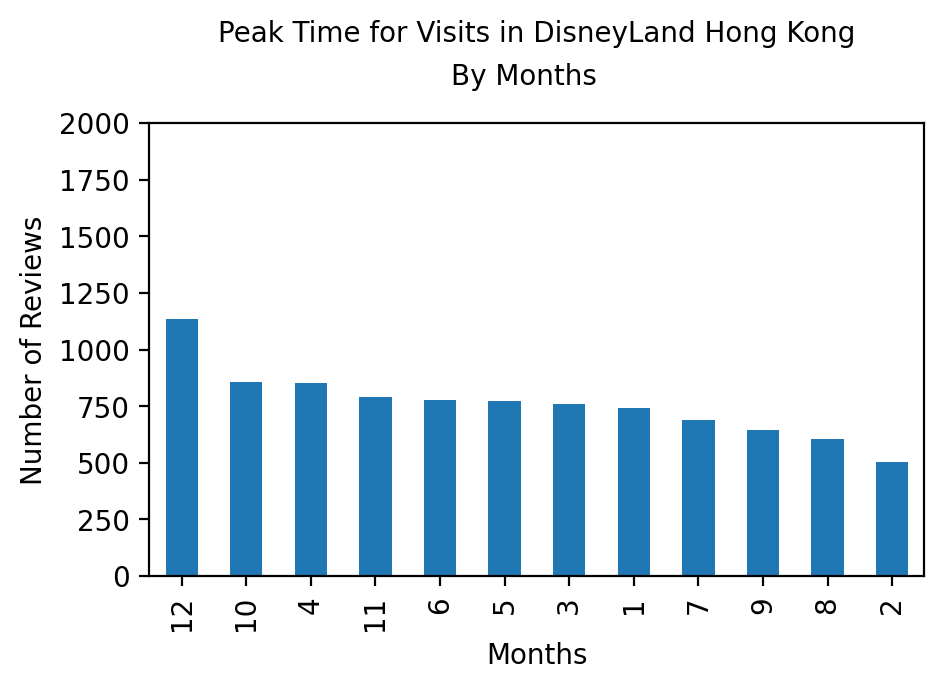

In [18]:
reviews_df_hk = reviews_df[reviews_df['Location'] == 'HongKong']

plt.figure(figsize=(5, 3), dpi=200)
reviews_df_hk.Month.value_counts().plot(kind = 'bar')
plt.title("Peak Time for Visits in DisneyLand Hong Kong\n\n", fontsize = 10);
plt.suptitle('By Months\n', fontsize = 10)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Number of Reviews", fontsize = 10)
plt.ylim(top=2000)

### Reviews Location count

In [16]:
reviews_df['Reviewer_Location'].value_counts()

United States               13522
United Kingdom               9115
Australia                    4412
Canada                       2116
India                        1470
                            ...  
Turks and Caicos Islands        1
Timor-Leste                     1
South Sudan                     1
Curaçao                         1
Andorra                         1
Name: Reviewer_Location, Length: 162, dtype: int64

Text(0.5, 1.0, 'Hong Kong Rating Distribution')

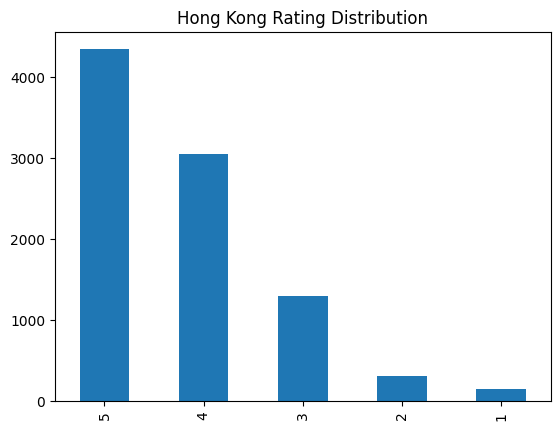

In [20]:
rating_df_hk = reviews_df[reviews_df['Location'] == 'HongKong']
rating_df_hk['Rating'].value_counts().plot(kind='bar')
plt.title('Hong Kong Rating Distribution')

Text(0.5, 1.0, 'Paris Rating Distribution')

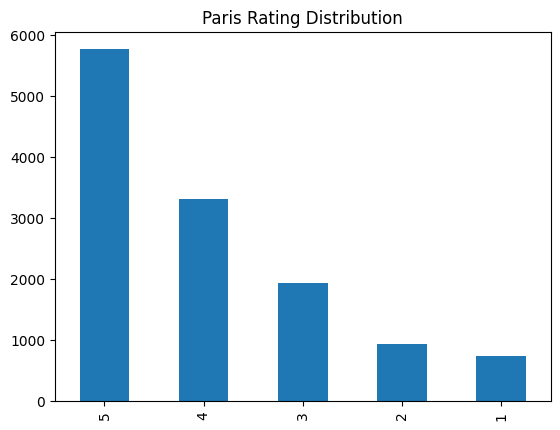

In [21]:
rating_df_par = reviews_df[reviews_df['Location'] == 'Paris']
rating_df_par['Rating'].value_counts().plot(kind='bar')
plt.title('Paris Rating Distribution')

Text(0.5, 1.0, 'California Rating Distribution')

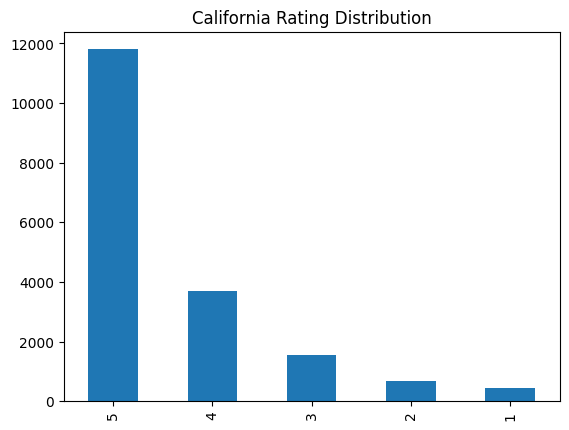

In [22]:
rating_df_ca = reviews_df[reviews_df['Location'] == 'California']
rating_df_ca['Rating'].value_counts().plot(kind='bar')
plt.title('California Rating Distribution')